# Titanic_Project

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

#### Data Overview

In [199]:
# identify the total number of passengers
df = pd.read_csv('C:\\Users\\Vishaly\\OneDrive\\Documents\\coding\\titanic\\train.csv')
df['PassengerId'].count()

891

In [200]:
# identify the number of survivors
df = pd.read_csv('C:\\Users\\Vishaly\\OneDrive\\Documents\\coding\\titanic\\train.csv')
df['Survived'].sum()

342

In [201]:
# identify the numbe of passengers survived under 18
df = pd.read_csv('C:\\Users\\Vishaly\\OneDrive\\Documents\\coding\\titanic\\train.csv')
df[df['Age'] < 18]['Survived'].sum()

61

In [202]:
# identify the number of male and female passengers
df = pd.read_csv('C:\\Users\\Vishaly\\OneDrive\\Documents\\coding\\titanic\\train.csv')
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [203]:
# import file from excel named train
df = pd.read_csv('C:\\Users\\Vishaly\\OneDrive\\Documents\\coding\\titanic\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
# unique values for the "Sex" column
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [205]:
# encode the "Sex" column with 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [206]:
# unique values for the "Embarked" column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [207]:
# encode the "Embarked" column with 0, 1, 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [208]:
# remove the passengerId column
df = df.drop(['PassengerId'], axis=1)

In [209]:
# describe the data
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [210]:
# identify number of rows and columns
df.shape

(891, 11)

In [211]:
# identify missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [212]:
# identify datatype
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked    float64
dtype: object

In [213]:
# identify unique values
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

#### Graphs representing data

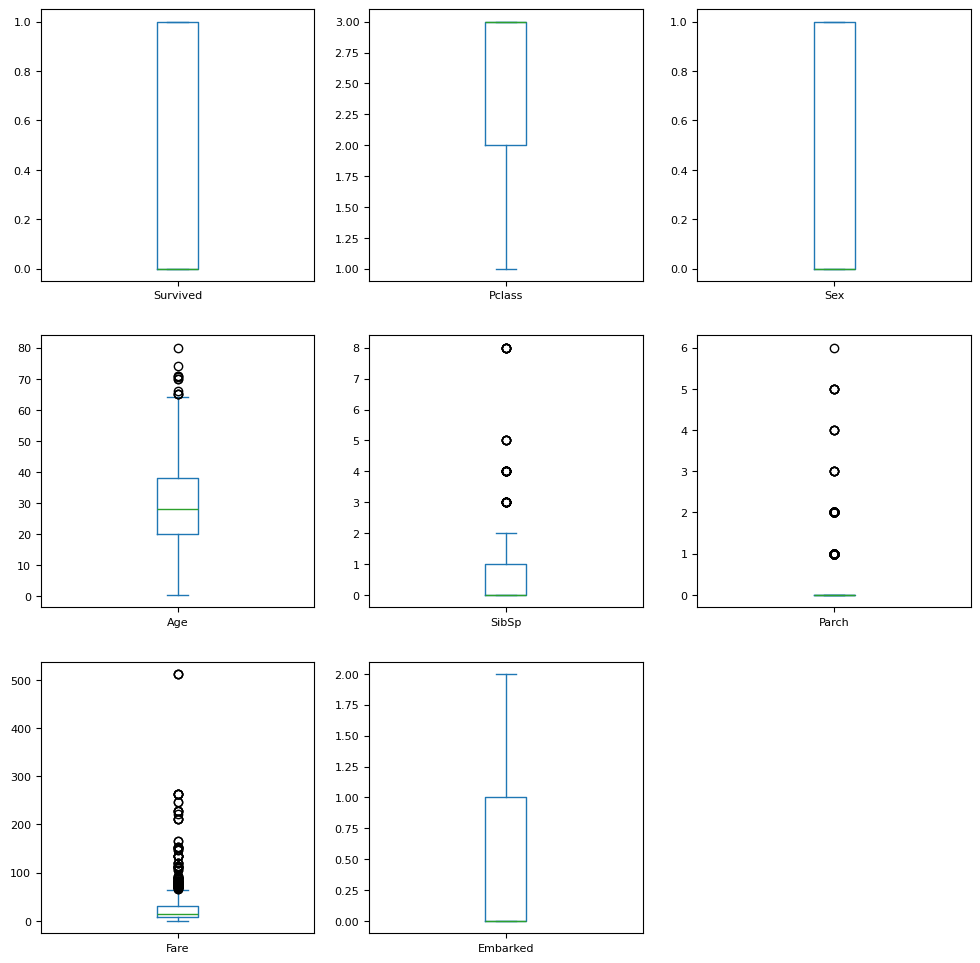

In [214]:
# draw a box plot of all numerical variables with outliers with labels
figsize = (12,12)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8, figsize=(12,12))
plt.show()

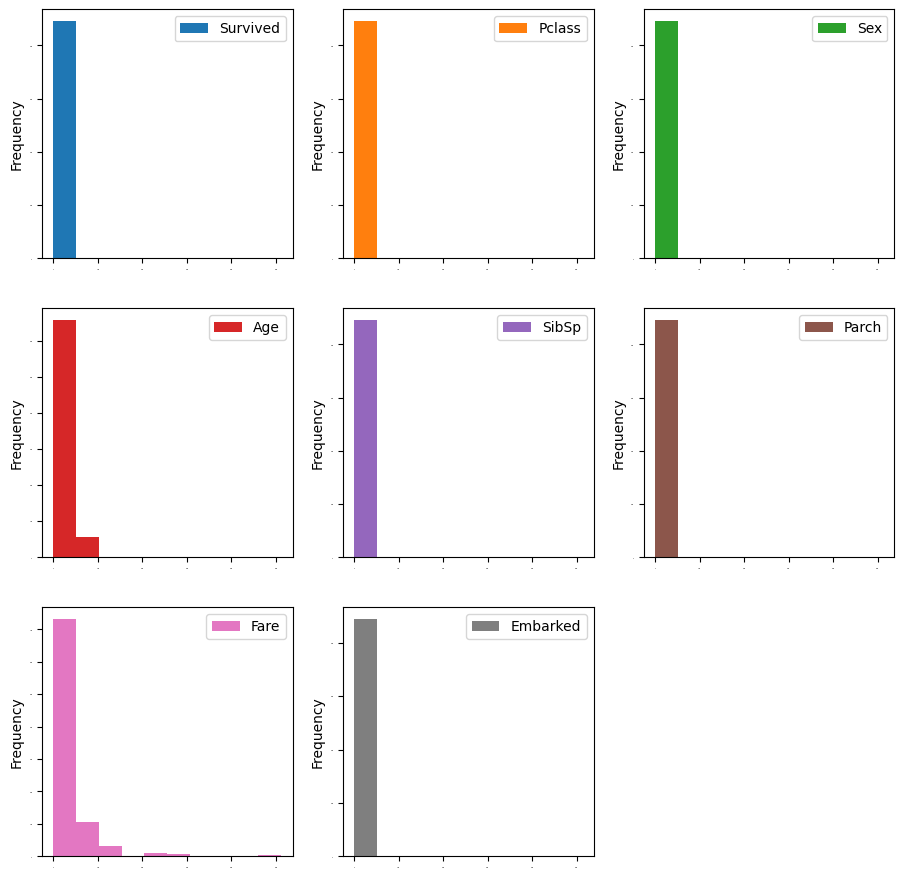

In [215]:
# draw a histogram of all numerical variables with labels
figsize = (11,11)
df.plot(kind='hist', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=1, figsize=figsize)
plt.show()


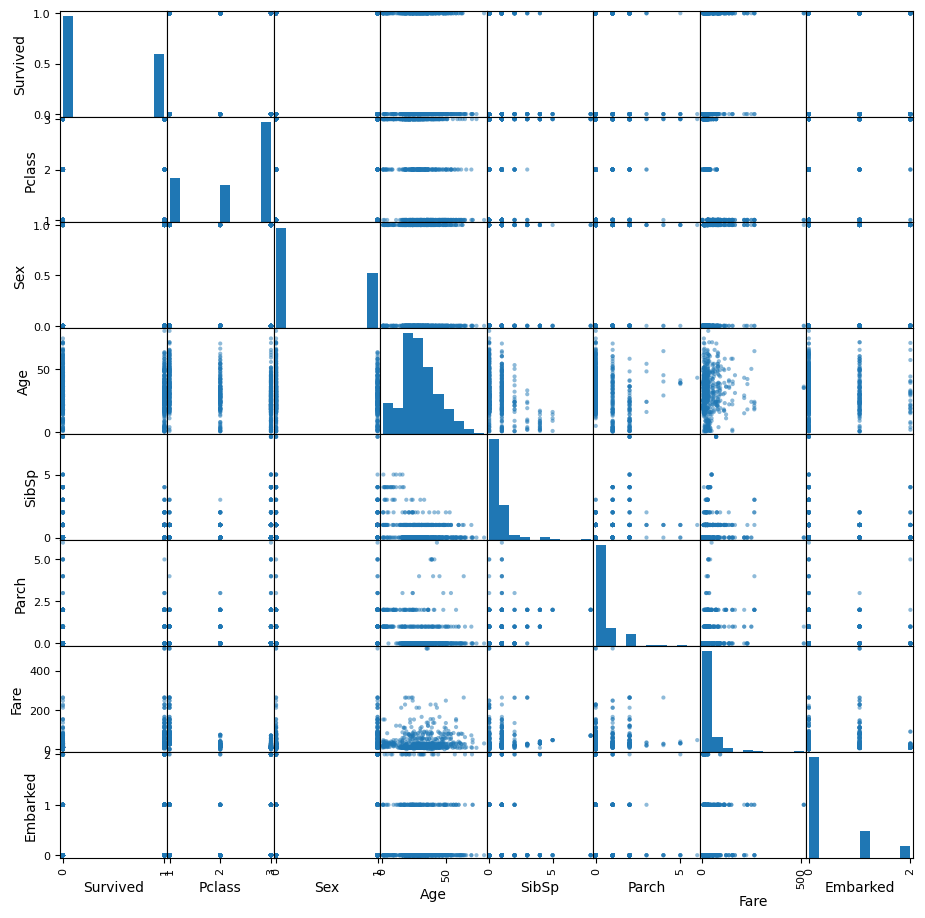

In [216]:
# draw a scatter matrix of all numerical variables
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(11,11))
plt.show()

## Data Normalization (Scaling)

In [217]:
# remove missing value from age
df.dropna(subset=['Age'], inplace=True)

In [218]:
# identify all missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       529
Embarked      2
dtype: int64

In [219]:
# remove all the missing values from embarked
df.dropna(subset=['Embarked'], inplace=True)

In [220]:
# identify unquie values for embarked
df['Embarked'].unique()

array([0., 1., 2.])

In [221]:
# identify all missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       529
Embarked      0
dtype: int64

In [222]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked    float64
dtype: object

In [223]:
# identify all unique values
df.nunique()

Survived      2
Pclass        3
Name        712
Sex           2
Age          88
SibSp         6
Parch         7
Ticket      541
Fare        219
Cabin       133
Embarked      3
dtype: int64

In [224]:
# identify the unique values for age
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [225]:
# identify all unique values for SipSp
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5], dtype=int64)

In [226]:
# identify all unique values for Parch
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [227]:
# identify all unique values for Fare
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,  51.8625,
        21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,  31.275 ,
         7.8542,  16.    ,  29.125 ,  18.    ,  26.    ,  13.    ,
         8.0292,  35.5   ,  31.3875, 263.    ,  27.7208,  10.5   ,
        82.1708,  52.    ,  11.2417,   9.475 ,  21.    ,  41.5792,
         7.8792,  17.8   ,  39.6875,   7.8   ,  76.7292,  61.9792,
         7.2292,  27.75  ,  46.9   ,  83.475 ,  27.9   ,   8.1583,
         8.6625,  73.5   ,  14.4542,  56.4958,   7.65  ,  29.    ,
        12.475 ,   9.    ,   9.5   ,  47.1   ,  15.85  ,  34.375 ,
        61.175 ,  20.575 ,  34.6542,  63.3583,  23.    ,   7.8958,
        77.2875,   8.6542,   9.825 ,  14.4583,   7.75  , 247.5208,
         7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,
         9.2167,  79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,
        12.525 ,  66.6   ,  61.3792,   7.7333,  16.1   ,  15.75  ,
         7.775 ,  20.525 ,  33.5   ,  30.6958,  28.7125,   0. 

In [228]:
# identify the max age 
df['Age'].max()

80.0

In [229]:
# indentify the max fare
df['Fare'].max()

512.3292

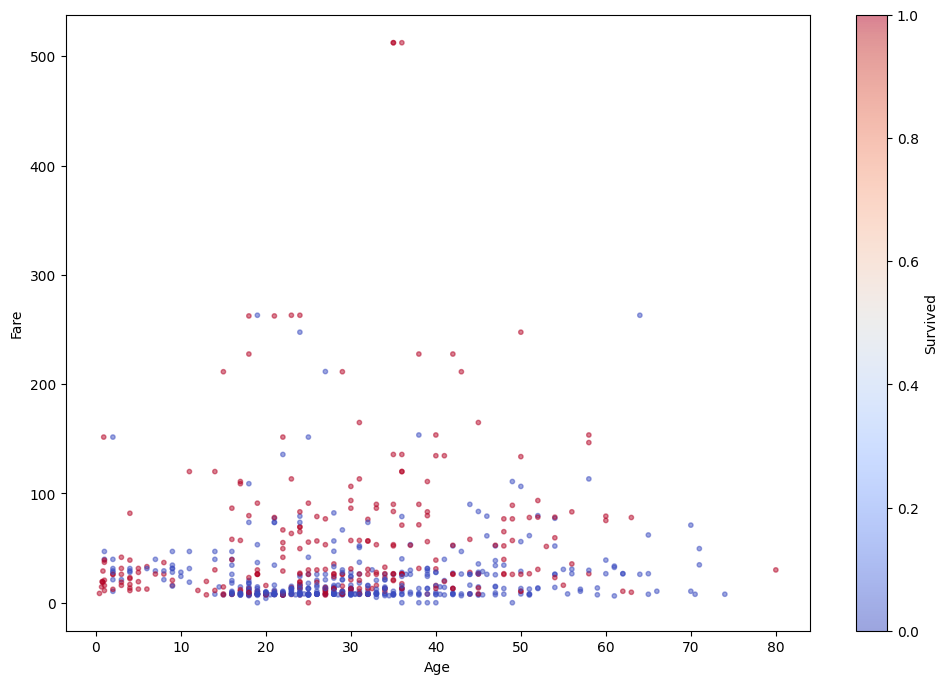

In [230]:
# draw a scatter plot for all values in fare with age 80 and below
df.plot(kind='scatter', x='Age', y='Fare', alpha=0.5, s=10, figsize=(12, 8), c='Survived', cmap=plt.get_cmap('coolwarm'))

plt.show()

In [231]:
# remove the outlier above 500 in fare
df = df[df['Fare'] < 500]

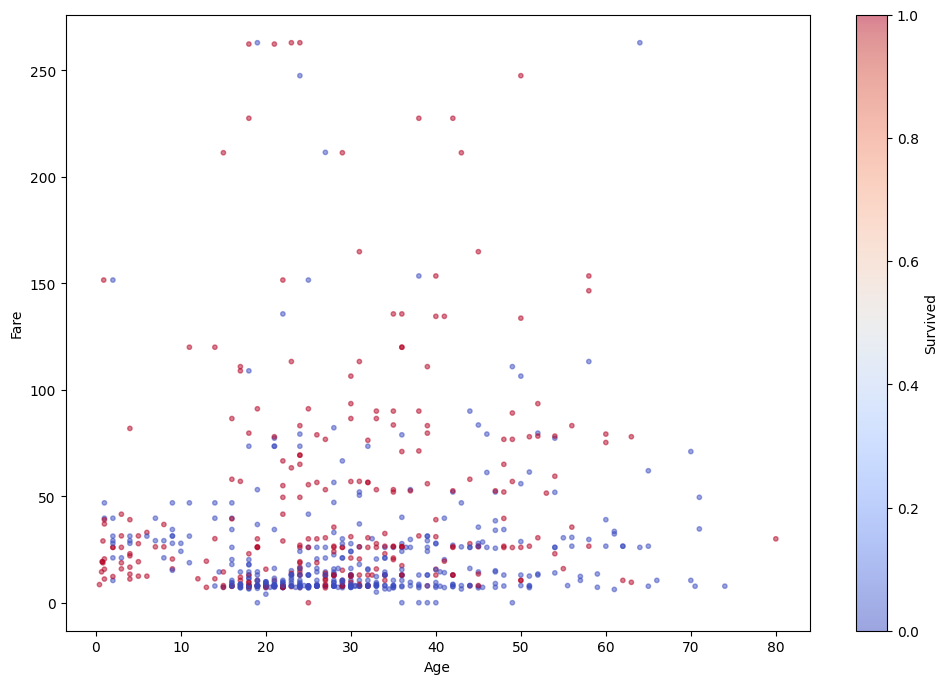

In [232]:
# draw a scatter plot for all values in fare with age 80 and below
df.plot(kind='scatter', x='Age', y='Fare', alpha=0.5, s=10, figsize=(12, 8), c='Survived', cmap=plt.get_cmap('coolwarm'))

plt.show()

In [233]:
# identify data types
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked    float64
dtype: object

In [234]:
# identify all unique values
df.nunique()

Survived      2
Pclass        3
Name        709
Sex           2
Age          88
SibSp         6
Parch         7
Ticket      540
Fare        218
Cabin       132
Embarked      3
dtype: int64

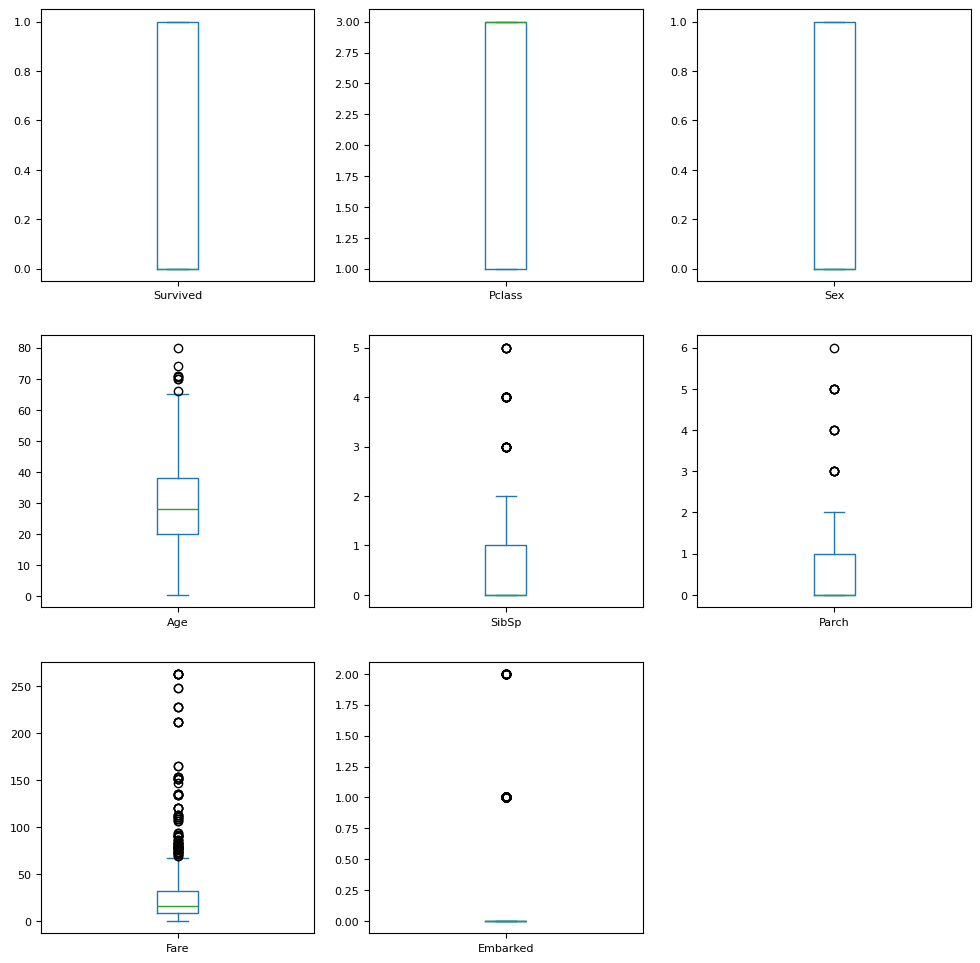

In [235]:
# draw a box plot of all numerical variables with outliers with labels
figsize = (12,12)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8, figsize=(12,12))
plt.show()

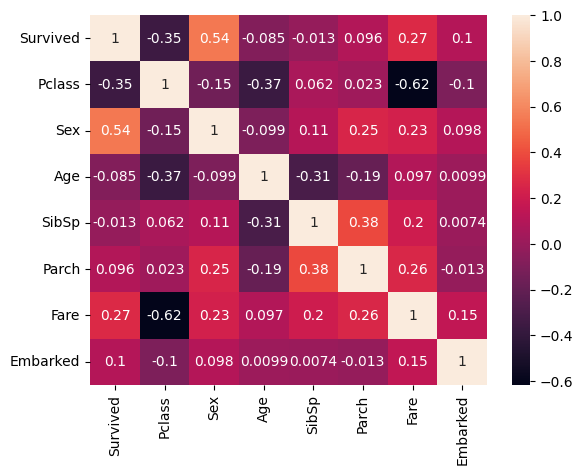

In [236]:
# remove non-numeric columns
df = df.select_dtypes(include=[np.number])


# show correlation
df.corr()
# show heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

## Logistic Regression

#### Training

In [237]:
# use logistic regression
from sklearn.linear_model import LogisticRegression

# use train test split
from sklearn.model_selection import train_test_split

# use confusion matrix
from sklearn.metrics import confusion_matrix

# use classification report
from sklearn.metrics import classification_report

In [238]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [239]:
# let x= all the numerical columns except survived
x = df.drop(['Survived'], axis=1)
# y=Survived
y = df['Survived']

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [240]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [241]:
# use logistic regression
lr = LogisticRegression()

# fit the model
lr.fit(x_train, y_train)

c:\Users\Vishaly\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Testing

In [242]:
predictions = lr.predict(x_test)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, predictions)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[76 15]
 [17 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        91
           1       0.69      0.67      0.68        51

    accuracy                           0.77       142
   macro avg       0.76      0.75      0.75       142
weighted avg       0.77      0.77      0.77       142



## Saving the model

In [243]:
# save the model
import pickle

with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(lr, f)